<a href="https://colab.research.google.com/github/favourphilic/EverythingHamoye/blob/main/StageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('/content/drive/MyDrive/HamoyeEverything/Time_series_analysis_and_forecast_DATASET.csv')

In [4]:
df.shape

(92016, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
!pip install pystan==2.19.1.1 --quiet
!pip install fbprophet --quiet
!pip install yfinance --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.1 MB/s eta 0:00:00


In [7]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [8]:
df['FullDate']= pd.to_datetime(df['FullDate'])
df = df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        92016 non-null  datetime64[ns]
 1   Tmax      92016 non-null  float64       
 2   SysLoad   92016 non-null  float64       
 3   GasPrice  92016 non-null  float64       
 4   y         92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


# Lets resample the data to daily level

In [10]:
df1 = df.copy()

In [11]:
df1 = df1[['ds','y']]
df1.set_index('ds', inplace=True)
df1.head()

,y
ds,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565
2010-09-01 03:00:00,18.910
2010-09-01 04:00:00,18.030


In [12]:
# Given there's no missing data, we can resample the data to daily level
daily_data = df1.resample(rule='D').sum()
# Set frequency explicitly to D
daily_data = daily_data.asfreq('D')

daily_data.head(10)

,y
ds,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555
2010-09-06,667.190
2010-09-07,664.570
2010-09-08,490.390
2010-09-09,507.040


In [13]:
#lets confirm if its in the right frequency

daily_data.index

DatetimeIndex(['2010-09-01', '2010-09-02', '2010-09-03', '2010-09-04',
               '2010-09-05', '2010-09-06', '2010-09-07', '2010-09-08',
               '2010-09-09', '2010-09-10',
               ...
               '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22',
               '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-02-27', '2021-02-28'],
              dtype='datetime64[ns]', name='ds', length=3834, freq='D')

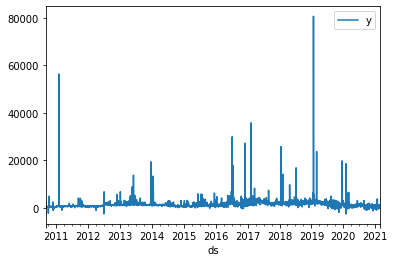

In [14]:
daily_data.plot()
plt.show()

In [15]:
daily_data.describe()

,y
count,3834.000000
mean,1579.160554
std,2290.321587
min,-2538.025000
25%,782.007500
50%,1241.140000
75%,1935.403750
max,80606.400000


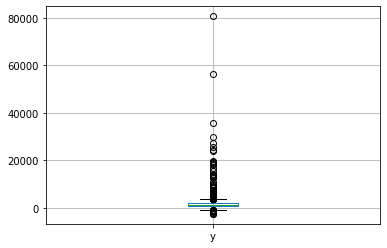

In [16]:
import seaborn as sns 
daily_data.boxplot()

In [17]:
daily_data.shape

(3834, 1)

In [18]:
#len of the daily dataframe
daily_data.shape[0] 

3834

In [19]:
train = daily_data.iloc[0:2757,:]

In [20]:
test = daily_data.iloc[2757:,:]

In [21]:
test.shape

(1077, 1)

In [22]:
train.reset_index(inplace=True)

In [23]:
train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [24]:
test.reset_index(inplace=True)

In [25]:
test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [26]:
# Importing and fitting the train data on prophet mdoel
from fbprophet import Prophet
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
test.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [28]:
forecast = model.predict(test) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2685.995282,102.332769,4967.642600,2685.995282,2685.995282,-154.967811,-154.967811,-154.967811,9.737563,9.737563,9.737563,-164.705374,-164.705374,-164.705374,0.0,0.0,0.0,2531.027472
1,2018-03-21,2686.787698,454.547643,5004.627674,2686.787698,2686.787698,-2.473227,-2.473227,-2.473227,159.362662,159.362662,159.362662,-161.835889,-161.835889,-161.835889,0.0,0.0,0.0,2684.314472
2,2018-03-22,2687.580114,428.585133,5047.834871,2687.580114,2687.580114,95.717382,95.717382,95.717382,257.120465,257.120465,257.120465,-161.403083,-161.403083,-161.403083,0.0,0.0,0.0,2783.297497
3,2018-03-23,2688.372531,79.099530,4979.914236,2688.372531,2688.372531,-112.965306,-112.965306,-112.965306,50.276079,50.276079,50.276079,-163.241385,-163.241385,-163.241385,0.0,0.0,0.0,2575.407225
4,2018-03-24,2689.164947,-178.216253,4739.817330,2689.164947,2689.164947,-438.563887,-438.563887,-438.563887,-271.455104,-271.455104,-271.455104,-167.108783,-167.108783,-167.108783,0.0,0.0,0.0,2250.601060


In [29]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2531.027472,102.332769,4967.642600,2685.995282,2685.995282,2685.995282
1,2018-03-21,2684.314472,454.547643,5004.627674,2686.787698,2686.787698,2686.787698
2,2018-03-22,2783.297497,428.585133,5047.834871,2687.580114,2687.580114,2687.580114
3,2018-03-23,2575.407225,79.099530,4979.914236,2688.372531,2688.372531,2688.372531
4,2018-03-24,2250.601060,-178.216253,4739.817330,2689.164947,2689.164947,2689.164947
...,...,...,...,...,...,...,...
1072,2021-02-24,3445.867803,712.180849,6396.322730,3535.465368,1959.028623,5205.628721
1073,2021-02-25,3512.732595,683.611652,6513.628686,3536.257784,1957.582803,5210.596306
1074,2021-02-26,3279.538049,457.526367,6325.826402,3537.050200,1956.136983,5215.563891
1075,2021-02-27,2936.193807,207.416191,5782.059099,3537.842616,1954.691163,5220.531476


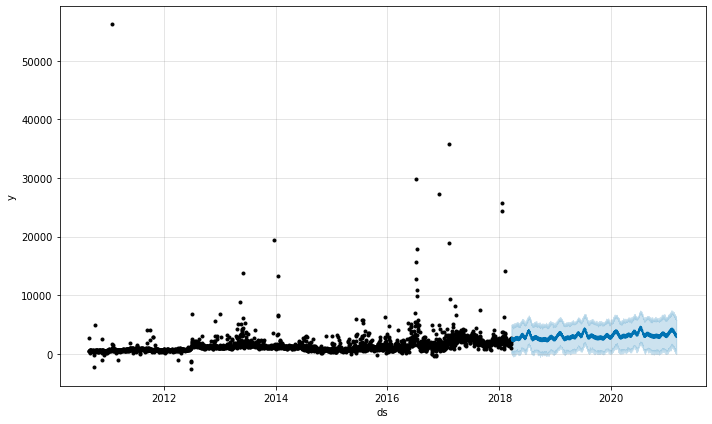

In [30]:
model.plot(forecast)
plt.show()

# Using the daily data with more one independent variable

In [31]:
df2 = df.copy()
df2.set_index('ds', inplace=True)
df2 = df2.rename(columns={"Tmax": "add1", "SysLoad": "add2", "GasPrice":"add3"})
df2.head(2)

,add1,add2,add3,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [32]:
daily_df = df2.resample(rule='D').sum()
# Set frequency explicitly to D
daily_df = daily_df.asfreq('D')

daily_df.head(5)

,add1,add2,add3,y
ds,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [33]:
daily_df.describe().T

,count,mean,std,min,25%,50%,75%,max
add1,3834.0,5560.720501,109504.776682,237.600,415.200000,525.600000,662.400000,2.399998e+06
add2,3834.0,19142.960568,11776.474105,-14631.136,10944.937575,20339.274975,28158.326725,5.354138e+04
add3,3834.0,144.387902,62.602608,0.000,94.485600,123.974400,192.546000,7.197600e+02
y,3834.0,1579.160554,2290.321587,-2538.025,782.007500,1241.140000,1935.403750,8.060640e+04


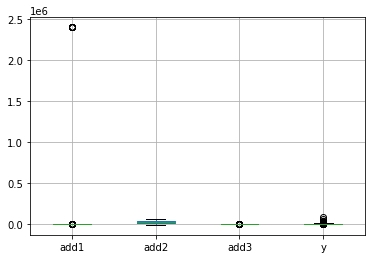

In [34]:
daily_df.boxplot()

In [35]:
daily_df.shape[0]

3834

In [36]:
train2 = daily_df.iloc[0:2757,:]
test2 = daily_df.iloc[2757:,:]

In [37]:
train2.reset_index(inplace=True)
test2.reset_index(inplace=True)

In [38]:
train2.head(3)

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [40]:
train2.tail(2)

,ds,add1,add2,add3,y
2755,2018-03-18,508.8,-4102.43795,203.988,1088.015
2756,2018-03-19,561.6,8731.39945,199.272,1998.305


In [39]:
test2.head(2)

,ds,add1,add2,add3,y
0,2018-03-20,540.0,7696.91130,201.588,1833.00
1,2018-03-21,571.2,4658.05865,203.256,1730.49


In [41]:
model2 = Prophet()
model2.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
forecast2 = model2.predict(test2) 
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2685.995282,361.394472,4924.481535,2685.995282,2685.995282,-154.967811,-154.967811,-154.967811,9.737563,9.737563,9.737563,-164.705374,-164.705374,-164.705374,0.0,0.0,0.0,2531.027472
1,2018-03-21,2686.787698,308.081009,5105.753684,2686.787698,2686.787698,-2.473227,-2.473227,-2.473227,159.362662,159.362662,159.362662,-161.835889,-161.835889,-161.835889,0.0,0.0,0.0,2684.314472
2,2018-03-22,2687.580114,343.326488,5129.390227,2687.580114,2687.580114,95.717382,95.717382,95.717382,257.120465,257.120465,257.120465,-161.403083,-161.403083,-161.403083,0.0,0.0,0.0,2783.297497
3,2018-03-23,2688.372531,415.719762,4900.069195,2688.372531,2688.372531,-112.965306,-112.965306,-112.965306,50.276079,50.276079,50.276079,-163.241385,-163.241385,-163.241385,0.0,0.0,0.0,2575.407225
4,2018-03-24,2689.164947,-91.576957,4478.548976,2689.164947,2689.164947,-438.563887,-438.563887,-438.563887,-271.455104,-271.455104,-271.455104,-167.108783,-167.108783,-167.108783,0.0,0.0,0.0,2250.601060


In [43]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2531.027472,361.394472,4924.481535,2685.995282,2685.995282,2685.995282
1,2018-03-21,2684.314472,308.081009,5105.753684,2686.787698,2686.787698,2686.787698
2,2018-03-22,2783.297497,343.326488,5129.390227,2687.580114,2687.580114,2687.580114
3,2018-03-23,2575.407225,415.719762,4900.069195,2688.372531,2688.372531,2688.372531
4,2018-03-24,2250.601060,-91.576957,4478.548976,2689.164947,2689.164947,2689.164947
...,...,...,...,...,...,...,...
1072,2021-02-24,3445.867803,307.396723,6506.755118,3535.465368,1887.310546,5205.864456
1073,2021-02-25,3512.732595,595.000304,6277.541800,3536.257784,1886.637797,5209.682233
1074,2021-02-26,3279.538049,266.273329,6245.431359,3537.050200,1886.140532,5213.500011
1075,2021-02-27,2936.193807,44.425213,5855.116268,3537.842616,1884.827667,5217.317789


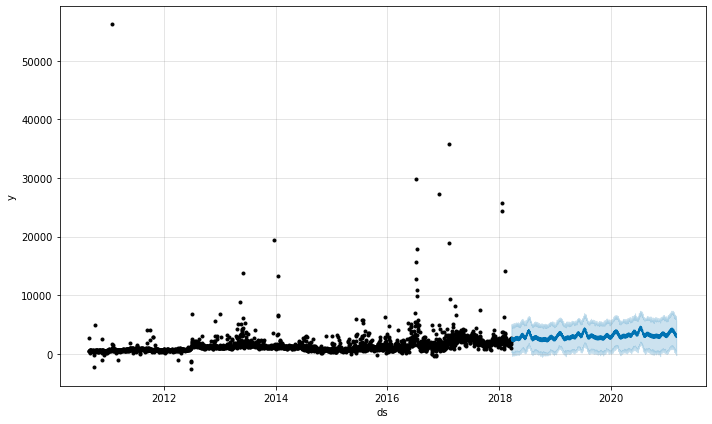

In [44]:
model2.plot(forecast2)
plt.show()

In [45]:
# Evaluating the model error
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
np.sqrt(mean_squared_error(y_true=test['y'],
                            y_pred=forecast['yhat']))

3208.169758357892

In [46]:
mean_absolute_error(y_true=test['y'],
                            y_pred=forecast['yhat'])

1732.3629669539546

In [47]:
daily_df.head(2)

,add1,add2,add3,y
ds,,,,
2010-09-01,379.2,41565.38,88.56,2751.70
2010-09-02,369.6,38898.99,88.56,570.81


In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
adfuller(daily_df['add2'])

(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [50]:
adfuller(daily_df['add3'])

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [51]:
adfuller(daily_df['y'])

(-8.269053866873803,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

### Calculating the MAPE

In [52]:
actual = list(test['y'])
predicted = list(forecast['yhat'])

In [53]:
print(len(actual))
print(len(predicted))

1077
1077


In [54]:
# Consider a list APE to store the
# APE value for each of the records in dataset
APE = []
  
# Iterate over the list values
for day in range(1077):
  
    # Calculate percentage error
    per_err = (actual[day] - predicted[day]) / actual[day]
  
    # Take absolute value of
    # the percentage error (APE)
    per_err = abs(per_err)
  
    # Append it to the APE list
    APE.append(per_err)
  
# Calculate the MAPE
MAPE = sum(APE)/len(APE)

print(f'''
MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } %
''')


MAPE   : 5.45
MAPE % : 544.76 %

